## (1) Import libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.fbprophet import Prophet

from sktime.utils.plotting import plot_series

In [75]:
# Record version of key libraries
from importlib.metadata import version

print('sktime==%s' % version('sktime'))

sktime==0.5.3


## (2) Get data

In [68]:
# Read local data
uni_data_series = pd.read_csv("../data/air_passengers.csv", index_col='ds')['y']

# NOTE - TBATS require index in PeriodIndex type
uni_data_period_series = uni_data_series.copy()
uni_data_period_series.index = pd.PeriodIndex(uni_data_period_series.index, freq="M")

# NOTE - Prophet require index in DatetimeIndex type
uni_data_datetime_series = uni_data_series.copy()
uni_data_datetime_series.index = pd.to_datetime(uni_data_datetime_series.index)

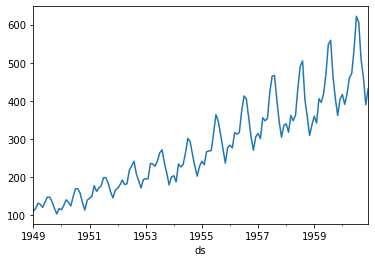

ds
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
Freq: M, Name: y, dtype: int64

In [69]:
# Visualise data
uni_data_period_series.plot()
plt.show()

display(uni_data_period_series.head())

## (3) Fit model

In [70]:
# Fit TBATS model
# NOTE - supports only univariate. requires index in PeriodIndex

tbats_forecaster = TBATS(
    sp=12
)
tbats_forecaster.fit(uni_data_period_series)

TBATS(sp=12)

In [71]:
# Fit FB prophet model
# NOTE - supports only univariate. requires index in DatetimeIndex

prophet_forecaster = Prophet(
    seasonality_mode='multiplicative'
)
prophet_forecaster.fit(uni_data_datetime_series)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prophet(seasonality_mode='multiplicative')

## (4) Generate predictions

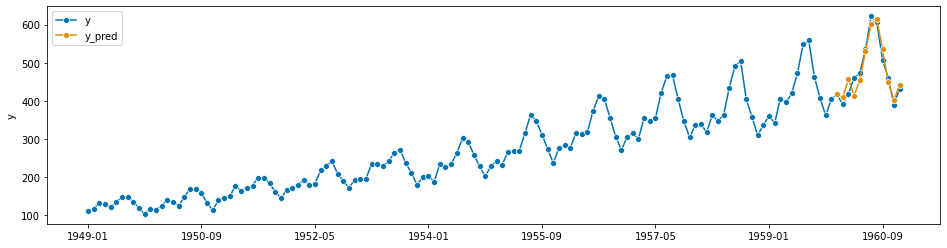

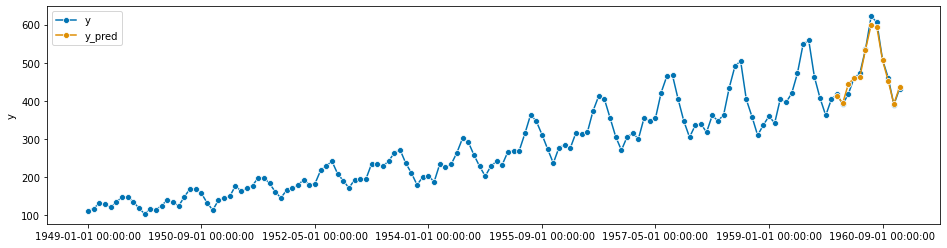

In [74]:
# Make prediction for next 12 months

# For TBATS
fh = ForecastingHorizon(uni_data_period_series.index[-12:], is_relative=False)
y_tbats_pred = tbats_forecaster.predict(fh=fh)

# For Prophet
fh = ForecastingHorizon(uni_data_datetime_series.index[-12:], is_relative=False)
y_prophet_pred = prophet_forecaster.predict(fh=fh)

plot_series(uni_data_period_series, y_tbats_pred, labels=["y", "y_pred"])
plot_series(uni_data_datetime_series, y_prophet_pred, labels=["y", "y_pred"])
plt.show()